# 泰坦尼克号幸存者的预测

In [1]:
# 1.导入所需的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [24]:
# 2.导入数据集并探索
data = pd.read_csv("data.csv",index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [26]:
#3.数据集预处理
#删除缺失值过多的列
del data["Cabin"]

#删除与预测无关的列
data.drop(["Ticket", "Name"], inplace=True, axis=1)

In [27]:
#处理缺失值["Age","Embarked"]
data["Age"] = data["Age"].fillna(data["Age"].mean())
data.dropna(inplace=True)

In [28]:
#将部分字符型数据转变成数值型变量
data["Sex"] = data["Sex"].map({"male":1,"female":0})

labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [43]:
# 4.提取标签和特征矩阵，区分测试集训练集
x = data.drop(["Survived"],axis=1)
y = data["Survived"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

修正训练测试集的索引
for i in [xtrain, xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [44]:
# 5.导入模型，粗略查看结果
clf = DecisionTreeClassifier(random_state=24)
clf = clf.fit(xtrain, ytrain)
score_ = clf.score(xtest, ytest)
score_

0.7640449438202247

In [45]:
score = cross_val_score(clf, x, y, cv=10).mean()
score

0.7761874361593463

0.8177860061287028


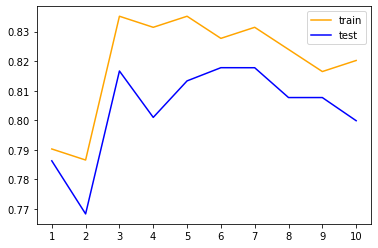

In [46]:
# 6.在不同的数深度情况下的表现
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=24,
                                max_depth=i+1,
                                criterion="entropy")
    clf = clf.fit(xtrain, ytrain)
    score_tr = clf.score(xtest, ytest)
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11), tr, color="orange", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [54]:
# 7.用网格搜索调参
import numpy as np
gini_thresholds = np.linspace(0, 0.5, 20)

parameters = {"splitter":("best", "random"),
             "criterion":("gini", "entropy"),
             "max_depth":[*range(1,10)],
             "min_samples_leaf":[*range(1, GS50, 5)],
             "min_impurity_decrease":[*np.linspace(0, 0.5, 20)]}

clf = DecisionTreeClassifier(random_state=24)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(xtrain,ytrain)

GS.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [55]:
GS.best_score_

0.8150281618023554